<a href="https://colab.research.google.com/github/kevinMGII/Grupo7-Practica1/blob/main/Grupo7_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRIMERA PRÁCTICA**. Predicción del Abandono de Empleados.

Grupo 7. Miembros:

*   *Kevin Medina García, 100495893.*
*   *Bárbara Sánchez Moratalla, 100495857.*






---



### **CARGA Y VISUALIZACIÓN DE LOS DATOS**

En el desarrollo de esta práctica se utilizarán los archivos que contienen los datos con la extension **12**. Cumpliendo así las consideraciones generales, siendo la suma de los últimos dos dígitos nuestros NIA's 12 en ambos casos.

A continuación se lee el conjunto de datos y se muestran las primeras filas.

In [ ]:
import pandas as pd

data_train = pd.read_csv("./attrition_availabledata_12.csv.gz")                 # Cargamos el conjunto de datos de entrenamiento
data_test = pd.read_csv("./attrition_competition_12.csv.gz")                    # Cargamos el conjunto de datos de test utilizando el almacenamiento local de Google Colab.

data_train.head()                                                               # Mostramos las 5 primeras filas del conjunto de datos de entrenamiento. (Not Working)
data_test.head()                                                                # Mostramos las 5 primeras filas del conjunto de datos de test.

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,6.894187,6,2,3,2.0,4.0,2.0,34,Travel_Rarely,Sales,...,0.0,Y,12,8,1,16.0,5,15,0,9
1,7.684525,7,2,3,3.0,4.0,1.0,30,Non-Travel,Research & Development,...,4.0,Y,18,8,3,9.0,2,5,1,4
2,6.806975,9,3,3,2.0,4.0,2.0,29,Travel_Frequently,Research & Development,...,1.0,Y,11,8,1,10.0,2,10,0,9
3,6.028659,6,3,3,2.0,1.0,3.0,44,Travel_Rarely,Research & Development,...,9.0,Y,15,8,0,24.0,3,20,3,6
4,7.618041,12,2,3,3.0,4.0,3.0,28,Non-Travel,Research & Development,...,0.0,Y,13,8,0,10.0,2,9,7,5


 ---

### **2. EDA SIMPLIFICADO**

A continuación, se realiza un Análisis Exploratorio de Datos (EDA). El objetivo es obtener una visión general del estado de los datos, permitiendo llevar a cabo algunos ajustes o limpiezas antes de empezar a utilizarlos.



**Número de  variables e instancias:**

In [ ]:
num_instancias, num_variables = data_train.shape                                # Usamos el atributo .shape de pandas para obtener la tupla (número de filas, número de columnas)
print(f"Número de instancias: {num_instancias}")                                # Imprimimos num_instancias (número de filas)
print(f"Número de variables: {num_variables}")                                  # Imprimimos num_variables (número de columnas)

Número de instancias: 2940
Número de variables: 31


El conjunto de datos con el que vamos a llevar a cabo esta práctica esta formado por 2940 instancias y 31 variables. Disponemos de una cantidad suficiente de datos como para entrenar un modelo de forma correcta.

**Tipos de variables (categóricas, numéricas u ordinales):**

In [ ]:
print(data_train.dtypes)                                                              # Mostramos los tipos de datos de cada columna del conjunto de datos de entrenamiento.

                                                                                      # Seleccionamos los tipos de datos categóricos y numéricos con pandas
categorical_vars = data_train.select_dtypes(include=['object', 'category']).columns   # Variables categóricas: aquellas de tipo 'object' o 'category'
numeric_vars = data_train.select_dtypes(include=['int64', 'float64']).columns         # Variables numéricas: aquellas de tipo 'int64' o 'float64'

print("Variables categóricas:", categorical_vars)                                     # Imprimimos las variables categóricas
print("Variables numéricas:", numeric_vars)                                           # Imprimimos las variables numéricas
# Las variables ordinales deben identificarse manualmente (mirar Nota)

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromot

Encontramos mayoritariamente variables numéricas en el conjunto de datos (23 variables numéricas frente a 8 variables categóricas).

*Nota: pandas no es capaz de identificar variables ordinales automáticamente.*


*Debemos analizar cada variable categórica y estudiar si existe un orden jerárquico entre los valores.*


```
# Ver valores únicos de la columna 'X' en el conjunto de entrenamiento
print(data_train['X'].unique())
```


* BusinessTravel (Non-Travel, Travel_Rarely, Travel_Frequently) -> No
* Department: (Sales, Research & Development, ...) -> No
* EducationField (Marketing, Medical, Life Sciences, ...) -> No
* Gender (Male, Female) -> No
* JobRole (Research Director, Sales Executive, Laboratory Technician, ...) -> No
* MaritalStatus (Single, Married, Divorced) -> No
* Over18 (N, Y) -> No
* Attrition (No, Yes) -> No

*Concluimos que no hay variables ordinales.*

**Variables categóricas con alta cardinalidad:**

In [ ]:
for col in data_train.columns:                                                  # Recorremos las columnas del conjunto de datos: data_train
    tipo_columna = data_train[col].dtype                                        # Almacenamos en una variable el tipo de dato de la columna actual
    if tipo_columna == 'object' or tipo_columna.name == 'category':             # Check: ¿El tipo es un objeto, texto?, ¿El tipo es una categoría?
        valores_unicos = data_train[col].unique()                               # Almacenamos en una variable los valores únicos de esa categoría
        num_valores_unicos = len(valores_unicos)                                # Obtenemos la cantidad de valores únicos que hay
        print("Cardinalidad de", col, ":", num_valores_unicos)                  # Mostramos la cardinalidad y el número de valores únicos por pantalla

Cardinalidad de BusinessTravel : 3
Cardinalidad de Department : 3
Cardinalidad de EducationField : 6
Cardinalidad de Gender : 2
Cardinalidad de JobRole : 9
Cardinalidad de MaritalStatus : 3
Cardinalidad de Over18 : 1
Cardinalidad de Attrition : 2


El resultado obtenido nos indica que la mayoría de variables categóricas en el conjunto de datos presentan una baja cardinalidad. Sin embargo, algunas como "JobRole" tienen una alta cardinalidad con hasta 9 valores distintos.

Además, se puede observar como "Over18" solamente tiene un valor, por lo que no aporta información relevante y debe ser eliminada.

**Variables con valores faltantes y cuántos son:**

In [ ]:
for col in data_train.columns:                                                  # Recorremos las columnas del conjunto de datos: data_train
    contador_faltantes = 0                                                      # Inicializamos el contador de faltantes a 0
    for valor in data_train[col]:                                               # Recorremos los valores de la columna
        if valor is None or valor != valor:                                     # Check: ¿El valor es nulo (faltante)? Especial: valor != valor para detectar NaN
            contador_faltantes += 1                                             # Incrementamos el contador de faltantes en una unidad
    if contador_faltantes > 0:                                                  # Check: ¿Hay valores faltantes en esa columna?
        print("Variable:", col, "- Valores faltantes:", contador_faltantes)     # Mostramos la variable con sus faltantes por pantalla

Variable: EnvironmentSatisfaction - Valores faltantes: 17
Variable: JobSatisfaction - Valores faltantes: 8
Variable: WorkLifeBalance - Valores faltantes: 23
Variable: NumCompaniesWorked - Valores faltantes: 12
Variable: TotalWorkingYears - Valores faltantes: 7


Tras la ejecución, se puede observar como hay cinco variables presentes en el modelo que contienen valores faltantes, destacando alguna como "WorkLifeBalance" con hasta 23 valores no presentes, o "EnvironmentSatisfaction" con hasta 17.

Durante el desarrollo de la práctica determinaremos qué estrategia seguir para solventar este problema, analizando el impacto de estas variables.

**Columnas constantes o columnas de ID:**

In [ ]:
for col in data_train.columns:                                                  # Recorremos las columnas del conjunto de datos: data_train
    valores_unicos = data_train[col].unique()                                   # Obtenemos los valores únicos de la columna
    if len(valores_unicos) == 1 and valores_unicos[0] == valores_unicos[0]:     # Check: ¿La columna tiene un solo valor? Especial: ...[0] == ...[0] para detectar NaN
        print("Variable:", col, "- Columna constante")                          # Mostramos la variable con la columna constante
    elif len(valores_unicos) == len(data_train):                                # Check: ¿El número de valores únicos es igual al número de filas?
        print("Posible columna de ID:", col)                                    # Mostramos la posible variable o columna de ID por pantalla

Variable: EmployeeCount - Columna constante
Posible columna de ID: EmployeeID
Variable: Over18 - Columna constante
Variable: StandardHours - Columna constante


Se identifican tres columnas constantes: "EmployeeCount", "Over18" y "StandardHours", así como una posible columna de id: "EmployeeID".

Las columnas constantes no aportan información relevante o que resulte útil al modelo, y pueden eliminarse.

La columna de id contiene valores únicos para cada fila, por lo que no contribuye al modelo y puede eliminarse.

**Comprobación del tipo de problema: ¿clasificación o regresión?**

In [ ]:
datos_col = data_train["Attrition"]                                             # Seleccionamos la columna "Attrition" del conjunto de datos de entrenamiento
valores_unicos = datos_col.unique()                                             # Obtenemos los valores únicos de la columna "Attrition"
print(valores_unicos)                                                           # Mostramos los valores únicos por pantalla

['No' 'Yes']


Como se puede observar en el resultado de la ejecución, se trata de un problema de clasificación binaria. El modelo podrá predecir una de las dos categorías: No, Yes.

**Puesto que es un problema de clasificación, ¿está desbalanceado?**

In [ ]:
datos_col = data_train["Attrition"]                                             # Seleccionamos la columna "Attrition" del conjunto de datos de entrenamiento
contador_clases = datos_col.value_counts()                                      # Contamos la cantidad de valores de cada clase en la columna "Attrition"
print(contador_clases)                                                          # Mostramos la cantidad de valores de cada clase por pantalla

Attrition
No     2466
Yes     474
Name: count, dtype: int64


Concluimos el Análisis Exploratorio de Datos (EDA) indicando que el problema de clasificación está desbalanceado. Esto es debido a que existe una mayor cantidad de valores en una categoría: "No", respecto a la otra: "Yes".

Un conjunto de datos desbalanceado puede provocar que el modelo aprenda mejor la categoría con mayor cantidad de valores y no aprenda correctamente la categoría con menor cantidad de valores.



---



### **3. CÓMO SE VA A REALIZAR LA EVALUCIÓN**

Tras realizar el EDA simplicado y observar que se trata de un problema de clasificación binaria desbalanceado, definimos en esta sección la estrategia de evaluación con la que entrenar y evaluar el modelo.

Antes de separar los datos en entrenamiento y test, limpiamos el conjunto de datos quitando aquellas variables que resultan irrelevantes, como se ha observado en el apartado anterior *(EmployeeID, EmployeeCount, Over18, StandardHours)*.

También aplicamos label encoding a la columna *Attrition*, que al tratarse de una variable binaria, conviene transformar sus valores categóricos ("No" y "Yes") en numéricos (0 y 1).

In [ ]:
from sklearn.model_selection import train_test_split

X = data_train.drop(columns=["EmployeeID", "EmployeeCount", "Over18", "StandardHours"]) # Eliminamos columnas irrelevantes para el modelo
X = data_train.drop(columns=["Attrition"])                                              # También eliminamos la columna 'Attrition' de las features X, ya que 'Attrition' es la variable a predecir (evitamos el data leakage)
y = data_train['Attrition'].map({'No': 0, 'Yes': 1})                                    # Convertimos a valores binarios

A continuación, definimos la separación entre train (66.6%) y test (33.3%). Usaremos como semilla el NIA de uno de los miembros del grupo, como se exige en el enunciado.

Además, al tratarse de un problemas desbalanceado, es importante especificar *stratify=y* en la separación para tener para tener el mismo desbalance en el conjunto de entrenamiento y en el de prueba. De lo contrario, el conjunto de entrenamiento podría no reflejar la distribución real de 'Attrition' y resultar poco útil para entrenar el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=100495893) # Dividimos en train y test
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0], "instancias")  # Imprimimos el número de instancias de entrenamiento
print("Tamaño del conjunto de prueba:", X_test.shape[0], "instancias")          # Imprimimos el número de instancias de test

Tamaño del conjunto de entrenamiento: 1969 instancias
Tamaño del conjunto de prueba: 971 instancias


El siguiente paso consiste en aplicar validación cruzada dentro del conjunto de datos de entrenamiento para la optimización de hiperparámetros. Puesto que se trata con un problema desbalanceado, la validación cruzada será estratificada, es decir, cada partición conserva la misma proporción de clases que el conjunto original. En la siguiente imagen se muestra de forma clara la estrategia:

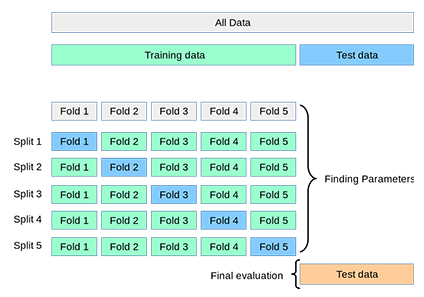

In [1]:
from sklearn.model_selection import StratifiedKFold

cv_inner = StratifiedKFold(                                                     # Inner evaluation -> validación cruzada estratificada (StratifiedKFold)
    n_splits=5,                                                                 # División del conjunto de entrenamiento en 5 particiones o folds.
    shuffle=True,                                                               # Se mezclan los datos antes de dividirlos para mayor aleatoriedad
    random_state=100495893                                                      # Se fija una semilla para garantizar reproducibilidad, en este caso, el NIA.
)

Queda
* hacer Stratified KFold en el conjunto de entrenamiento (Inner Evaluation) para la optimización de hiperparámetros. Se recomienda eso porque es un problema desbalanceado. ✔️
* evaluar con Balanced Accuracy, TPR, TNR, Accuracy y matriz de confusión.
* una vez seleccionado el mejor modelo, evaluar en test para saber la estimación final del modelo.